In [1]:
import seaborn as sns
import pandas as pd
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def scale_images(train_images, test_images):
    # Calculate the maximum value of the train_images dataset
    max_value = np.max(train_images)

    train_images_scaled = train_images / max_value
    test_images_scaled = test_images / max_value

    return train_images_scaled, test_images_scaled

In [3]:
# Specify the path to the train-images-idx3-ubyte file
file_path_train_images = 'Dataset/train-images-idx3-ubyte'
file_path_train_labels = 'Dataset/train-labels-idx1-ubyte'
file_path_test_images = 'Dataset/t10k-images-idx3-ubyte'
file_path_test_labels = 'Dataset/t10k-labels-idx1-ubyte'

train_images = idx2numpy.convert_from_file(file_path_train_images)
train_labels = idx2numpy.convert_from_file(file_path_train_labels)
test_images = idx2numpy.convert_from_file(file_path_test_images)
test_labels = idx2numpy.convert_from_file(file_path_test_labels)

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


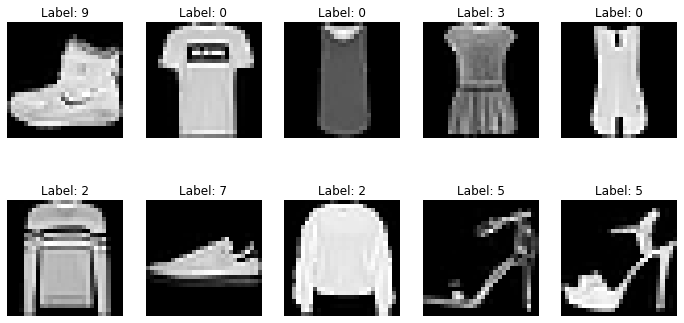

In [4]:
train_images_scaled = scale_images(train_images, test_images)[0]

# Plot the first 10 images from the train_images_scaled dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images_scaled[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Label: {train_labels[i]}')
plt.show()

In [5]:
num_samples = len(train_images) + len(test_images)
print("Number of samples in the dataset:", num_samples)

# Count the number of samples for each class
class_counts = {}
for label in train_labels:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1
for label in test_labels:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1
print("Number of samples for each class:", class_counts)

# Get the dimension of the images
image_shape = train_images[0].shape
print("Dimension of the images:", image_shape)


Number of samples in the dataset: 70000
Number of samples for each class: {9: 7000, 0: 7000, 3: 7000, 2: 7000, 7: 7000, 5: 7000, 1: 7000, 6: 7000, 4: 7000, 8: 7000}
Dimension of the images: (28, 28)


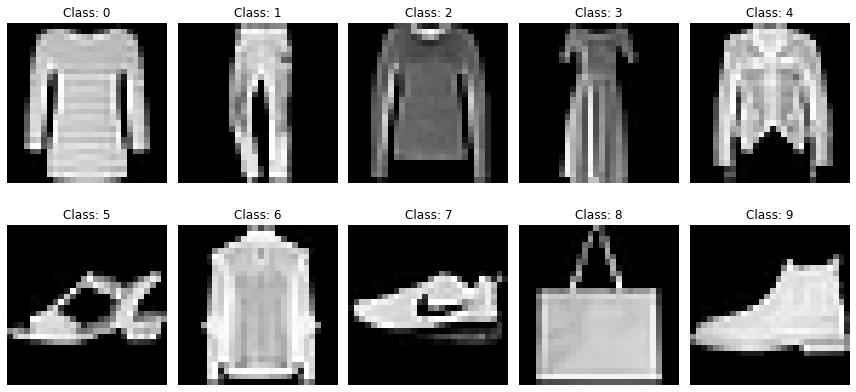

In [6]:
# Define the number of rows and columns for the subplots
num_rows = 2
num_cols = 5
num_classes = 10

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Iterate over each class
for class_label in range(num_classes):
    # Get the indices of the images belonging to the current class
    indices = np.where(test_labels == class_label)[0]
    
    # Randomly select an image from the current class
    random_index = np.random.choice(indices)
    
    # Get the image and its corresponding label
    image = test_images[random_index]
    label = test_labels[random_index]
    
    # Get the subplot corresponding to the current class
    row = class_label // num_cols
    col = class_label % num_cols
    ax = axes[row, col]
    
    # Display the image
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Class: {label}')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

In [7]:
# Count the number of samples for each class for training
class_counts = {}
for label in train_labels:
    if label in class_counts:
        class_counts[label] += 1
    else:
        class_counts[label] = 1

print(class_counts)

{9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000}


In [8]:
train_images_scaled, test_images_scaled = scale_images(train_images, test_images)

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def one_hot_encode(labels, num_classes):
    num_samples = len(labels)
    encoded_labels = np.zeros((num_samples, num_classes))
    encoded_labels[np.arange(num_samples), labels] = 1
    return encoded_labels

def logistic_regression(X_train, y_train, X_val, y_val, learning_rate=0.1, num_iterations=1000):
    num_samples, num_features = X_train.shape
    weights = np.zeros(num_features)
    bias = 0

    epsilon = 1e-7  # to avoid taking log of zero

    train_loss = []
    train_accuracy = []
    val_loss = []
    val_accuracy = []

    for i in range(num_iterations):
        logits = np.dot(X_train, weights) + bias
        probabilities = sigmoid(logits)

        # Add epsilon inside the log function
        loss = -np.mean(y_train * np.log(probabilities + epsilon) + (1 - y_train) * np.log(1 - probabilities + epsilon))
        gradients = (1 / num_samples) * np.dot(X_train.T, (probabilities - y_train))

        weights -= learning_rate * gradients
        bias -= learning_rate * np.mean(probabilities - y_train)

        train_predictions = (probabilities >= 0.5).astype(int)
        train_accuracy.append(np.mean(train_predictions == y_train))

        val_logits = np.dot(X_val, weights) + bias
        val_probabilities = sigmoid(val_logits)
        val_predictions = (val_probabilities >= 0.5).astype(int)
        val_accuracy.append(np.mean(val_predictions == y_val))

        val_loss.append(-np.mean(y_val * np.log(val_probabilities + epsilon) + (1 - y_val) * np.log(1 - val_probabilities + epsilon)))
        train_loss.append(loss)

    return weights, bias, train_loss, train_accuracy, val_loss, val_accuracy



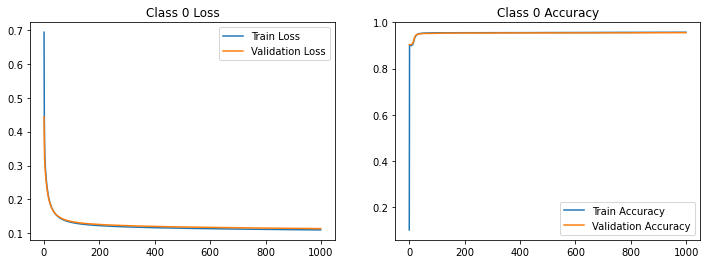

Final Test Loss for Class 0: 0.11469508564341391
Final Test Accuracy for Class 0: 0.9562


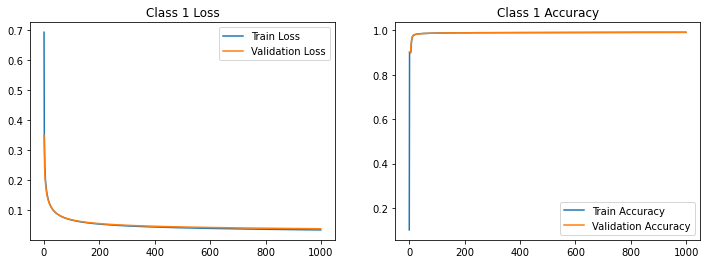

Final Test Loss for Class 1: 0.036625401789780396
Final Test Accuracy for Class 1: 0.9901


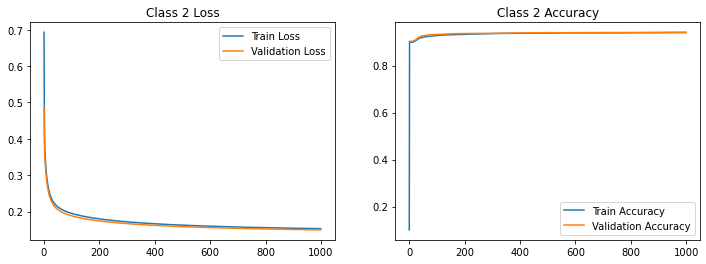

Final Test Loss for Class 2: 0.15440251820062975
Final Test Accuracy for Class 2: 0.9392


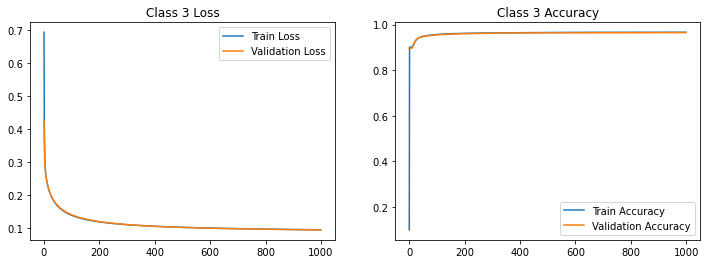

Final Test Loss for Class 3: 0.10190797357526396
Final Test Accuracy for Class 3: 0.9644


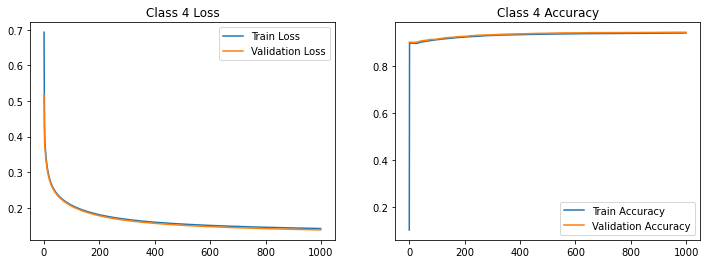

Final Test Loss for Class 4: 0.15061577845966215
Final Test Accuracy for Class 4: 0.9396


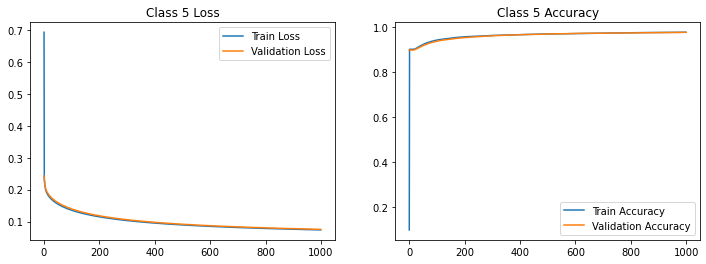

Final Test Loss for Class 5: 0.07496983869970424
Final Test Accuracy for Class 5: 0.9742


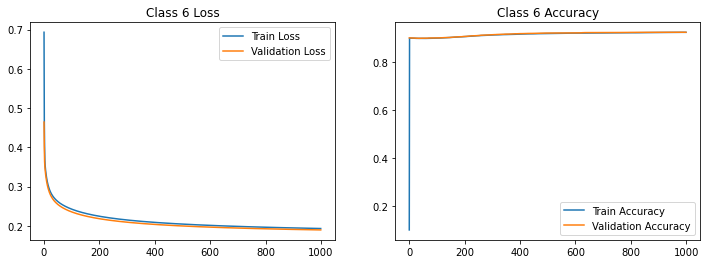

Final Test Loss for Class 6: 0.20747837052545118
Final Test Accuracy for Class 6: 0.9198


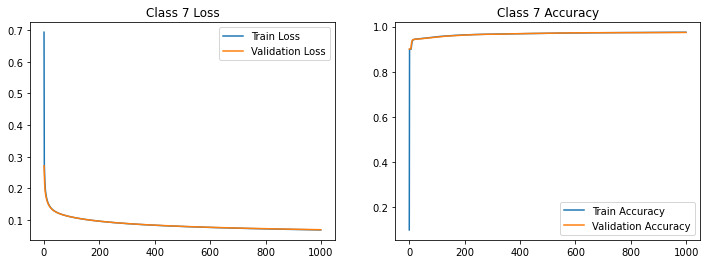

Final Test Loss for Class 7: 0.06834442904451929
Final Test Accuracy for Class 7: 0.9744


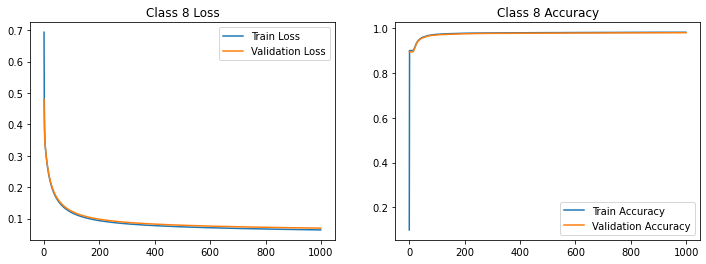

Final Test Loss for Class 8: 0.06673313227672217
Final Test Accuracy for Class 8: 0.9824


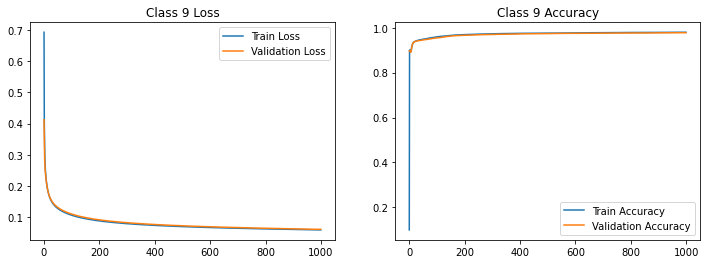

Final Test Loss for Class 9: 0.059525632421983346
Final Test Accuracy for Class 9: 0.979


In [10]:
# Train one logistic regression model for each class
models = []
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

num_classes = 10

# Assuming train_images_scaled and test_images_scaled are numpy arrays
train_images_flat = train_images_scaled.reshape(train_images_scaled.shape[0], -1)
test_images_flat = test_images_scaled.reshape(test_images_scaled.shape[0], -1)

val_ratio = 0.2

# Calculate the number of validation samples
num_val = int(train_images_flat.shape[0] * val_ratio)
# Shuffle the indices of the data, so the validation set is random
indices = np.random.permutation(train_images_flat.shape[0])

val_images_flat, train_images_flat = train_images_flat[indices[:num_val]], train_images_flat[indices[num_val:]]
val_labels, train_labels = train_labels[indices[:num_val]], train_labels[indices[num_val:]]

for class_label in range(num_classes):
    # Create a binary label array for the current class
    binary_labels_train = (train_labels == class_label).astype(int)
    binary_labels_val = (val_labels == class_label).astype(int)
    
    # Train the logistic regression model
    weights, bias, train_loss, train_accuracy, val_loss, val_accuracy = logistic_regression(train_images_flat, binary_labels_train, val_images_flat, binary_labels_val)
    models.append((weights, bias))
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Plot training loss and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Class ' + str(class_label) + ' Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracy, label='Train Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Class ' + str(class_label) + ' Accuracy')
    plt.legend()

    plt.show()

    # Create a binary label array for the test set
    binary_labels_test = (test_labels == class_label).astype(int)
    epsilon = 1e-7  # to avoid taking log of zero

    # Calculate test loss and accuracy
    test_logits = np.dot(test_images_flat, weights) + bias
    test_probabilities = sigmoid(test_logits)
    test_predictions = (test_probabilities >= 0.5).astype(int)
    test_loss = -np.mean(binary_labels_test * np.log(test_probabilities + epsilon) + (1 - binary_labels_test) * np.log(1 - test_probabilities + epsilon))
    test_accuracy = np.mean(test_predictions == binary_labels_test)

    print('Final Test Loss for Class ' + str(class_label) + ':', test_loss)
    print('Final Test Accuracy for Class ' + str(class_label) + ':', test_accuracy)

In [11]:
def predict(X, weights, bias):
    logits = np.dot(X, weights) + bias
    probabilities = sigmoid(logits)
    return (probabilities >= 0.5).astype(int)

# Initialize an array to store the predictions for each class
predictions = np.zeros((test_images_flat.shape[0], num_classes))

# Compute the predictions for each class
for class_label in range(num_classes):
    weights, bias = models[class_label]
    predictions[:, class_label] = predict(test_images_flat, weights, bias)

predicted_classes = np.argmax(predictions, axis=1)

# Compute the accuracy by comparing the predicted classes to the true classes
accuracy = np.mean(predicted_classes == test_labels)
print(f'Test accuracy: {accuracy * 100:.2f}%')



Test accuracy: 74.65%


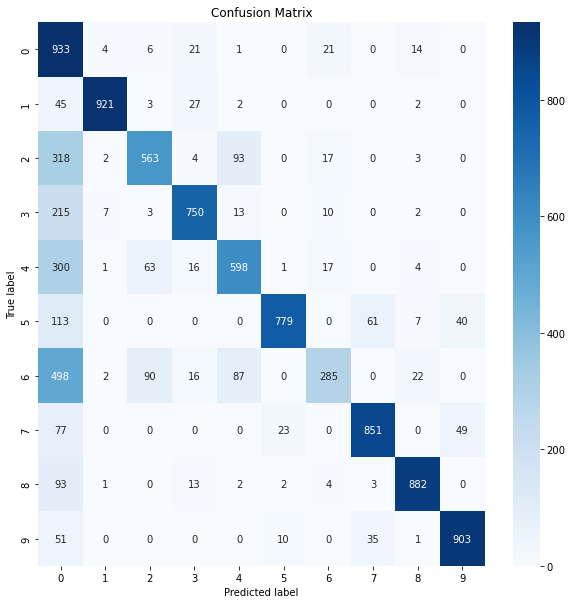

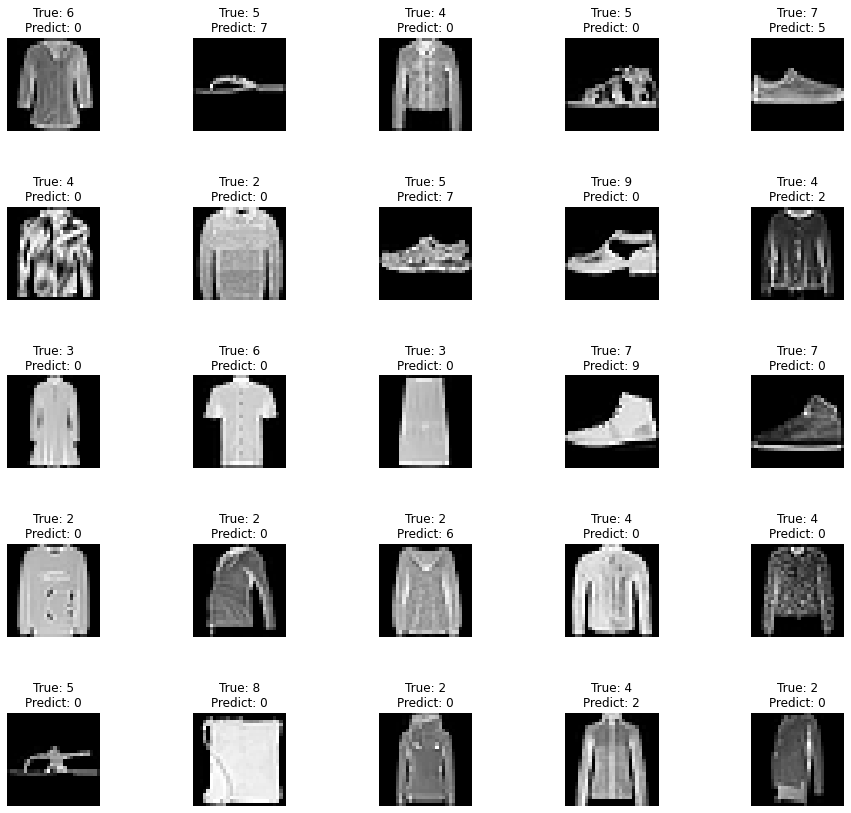

In [12]:
# Compute the confusion matrix
num_classes = len(np.unique(test_labels))
cm = np.zeros((num_classes, num_classes), dtype=int)
for true_label, predicted_label in zip(test_labels, predicted_classes):
    cm[true_label, predicted_label] += 1

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Find the misclassified examples
misclassified_idxs = np.where(predicted_classes != test_labels)[0]

# Plot some misclassified examples
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i, idx in enumerate(misclassified_idxs[:25]):
    axes[i].imshow(test_images[idx], cmap='gray')
    axes[i].set_title(f'True: {test_labels[idx]}\nPredict: {predicted_classes[idx]}')
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)